In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cassandra.cluster import Cluster
import plotly.express as px

plt.rcParams["figure.figsize"] = (20,10)

In [13]:
cluster = Cluster(['172.31.10.156', '172.31.10.119', '172.31.0.245','172.31.6.65','172.31.8.141'])
session = cluster.connect("nosql")
def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)
session.row_factory = pandas_factory
session.default_fetch_size = None

**Requête 3**

In [14]:
def format_date(df):
    df['date'] = df.year.astype('str') + "-" + df.month.astype('str') + "-" + df.day.astype('str')
    df['date'] = pd.to_datetime(df.date, format = '%Y.%m.%d')
    return df

In [15]:
cnt = 0
night_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rgb(34, 53, 101)',
                'rgb(36, 55, 57)', 'rgb(6, 4, 4)']
colors2 = ['#CFE0F0', '#9FC2E3', '#7791AA', '#2D6394', '#1F4263', '#17314A']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
def func(pct, df):
    global cnt
    val = df["tone"].values[cnt]
    cnt +=1
    #"{:.1f}%\n({:d} g)".format(pct, absolute)
    #return val
    return "{:.1f}".format(val)
    
def camembert(df):
    global cnt
    cnt = 0    
    plt.title('Les thèmes les plus cités et leurs tons', weight = 'bold')
    plt.pie(df['theme_count'], labels=df[theme_pers_lieu], autopct=lambda pct: func(pct, df), colors= colors2)
    return ""


def camembert2(df):
    plt.title('Les thèmes les plus cités et leurs tons', weight = 'bold')
    plt.pie(df['theme_count'], labels=df['theme'])
    return ""

def requete3_test(source, param= 'theme', year = 'Null', month = 'Null', day = 'Null'):  
        global theme_pers_lieu 
        theme_pers_lieu = param
        table = ""
        if theme_pers_lieu == 'theme' : 
            table = 'req31'
        elif theme_pers_lieu == 'person' : 
            table = 'req32'
        elif theme_pers_lieu == 'location': 
            table = 'req33'
            
        if (day != 'Null' and month != 'Null'and year != 'Null'):
            query2 = "SELECT * from "+ table + " WHERE source='"+ source + "' AND year=" + str(year) + " And month=" + str(month)  +" AND day=" + str(day) 
            print(query2)
            query_old = "SELECT * from req31 WHERE source='"+ source + "' AND year=" + str(year) + " And month=" + str(month) +" AND day=" + str(day) + " limit 10"
            rslt = session.execute(query2, timeout=None)
            df = rslt._current_rows
            df_day = format_date(df).iloc[:10]
            camembert(df_day)
        
        elif (day == 'Null' and month != 'Null' and year != 'Null'):
            query_old = "SELECT * from req31 WHERE source='"+ source + "' AND year=" + str(year) + " And month=" + str(month) 
            query2 = "SELECT * from "+ table + " WHERE source='"+ source + "' AND year=" + str(year) + " And month=" + str(month) 
           # print(query2)
            rslt = session.execute(query2, timeout=None)
            df = rslt._current_rows
            df[['theme_count', 'tone_sum']] = df.groupby([theme_pers_lieu])['count', 'tone'].cumsum()
#             df["f1"] = df["theme"].apply(lambda s: 1)
#             df["number_days_theme_appeared"]= df.groupby(["theme"])['f1'].cumsum()     
            df = df.sort_values(by=['theme_count'], ascending = False)
            df = df.drop_duplicates(subset = theme_pers_lieu, keep='first')[:10]
#             df_month["Average_tone"]= df["tone_sum"]/df["number_days_theme_appeared"]
            camembert(df[:10])
            #df_tonalite = df_month[["theme", "Average_tone"]]
        
        elif (day == 'Null' and month == 'Null' and year != 'Null'):
           # print("toto")
            query_old = "SELECT * from req31 WHERE source='"+ source + "' AND year=" + str(year) 
            query2 = "SELECT * from "+ table + " WHERE source='"+ source + "' AND year=" + str(year)
            rslt = session.execute(query2, timeout=None)
            df = rslt._current_rows                   
            df[['theme_count', 'tone_sum']] = df.groupby([theme_pers_lieu])['count', 'tone'].cumsum()
#             df["f1"] = df["theme"].apply(lambda s: 1)
#             df["number_days_theme_appeared"]= df.groupby(["theme"])['f1'].cumsum()     
            df = df.sort_values(by=['theme_count'], ascending = False)
            df = df.drop_duplicates(subset = theme_pers_lieu, keep='first')[:10]
#             df_month["Average_tone"]= df["tone_sum"]/df["number_days_theme_appeared"]
            camembert(df[:10])
            #df_tonalite = df_month[["theme", "Average_tone"]]
                
        return df

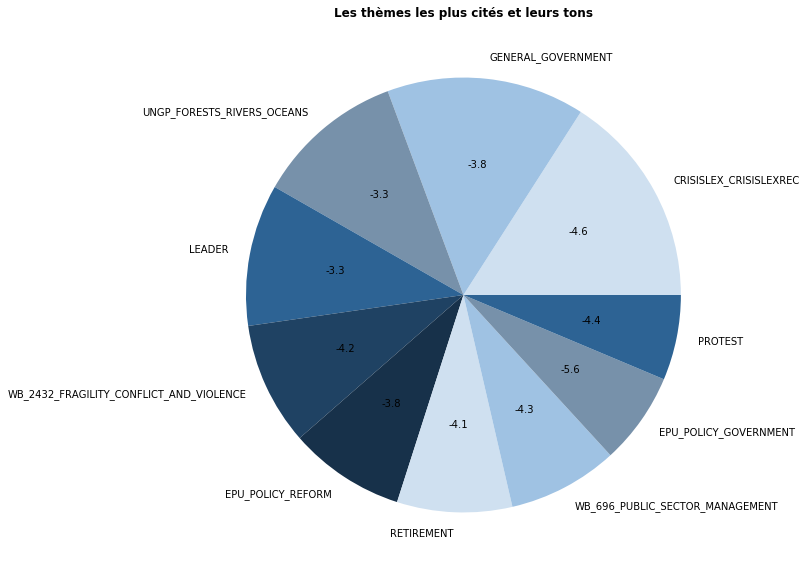

In [16]:
test2 = requete3_test(source = 'liberation.fr' , param="theme", year = 2019, month=12)

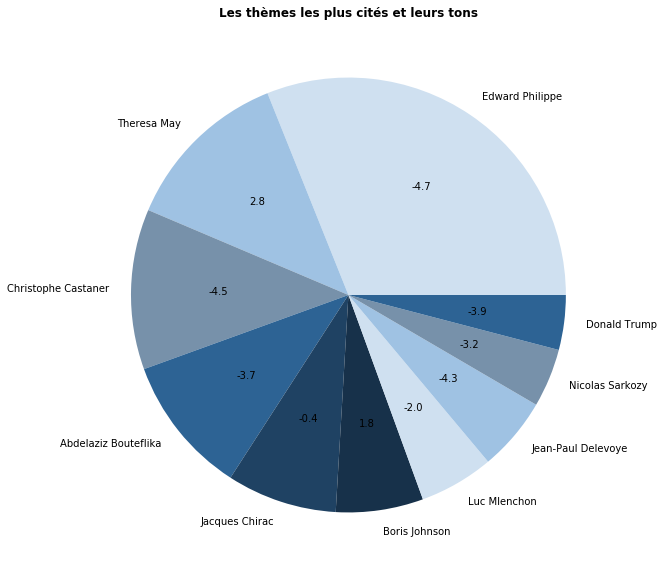

In [11]:
test3 = requete3_test(source = 'liberation.fr' , param="person", year = 2019)